


```
Parkinson's disease Classification
Name:- Sanil Rodrigues
```



**Source:**
<br>
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

<br>
<br>

**Data Set Information:**
<br>
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

<br>
<br>

**Attribute Information:**
<br>

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

Read Dataset

In [ ]:
df = pd.read_csv("parkinsons.data")

In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.shape

(195, 24)

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df = df.drop('name', axis = 1)

In [ ]:
df.isnull().sum() * 100 / len(df)

MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

In [ ]:
X = df.loc[:,df.columns!='status']
y = df.loc[:,'status']

In [ ]:
feature_scale = StandardScaler()

X_stand = feature_scale.fit_transform(X)
X_stand = pd.DataFrame(X_stand, columns = X.columns).reset_index(drop=True)

In [ ]:
df_X_corr = X_stand.corr(method = 'pearson')
df_X_corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

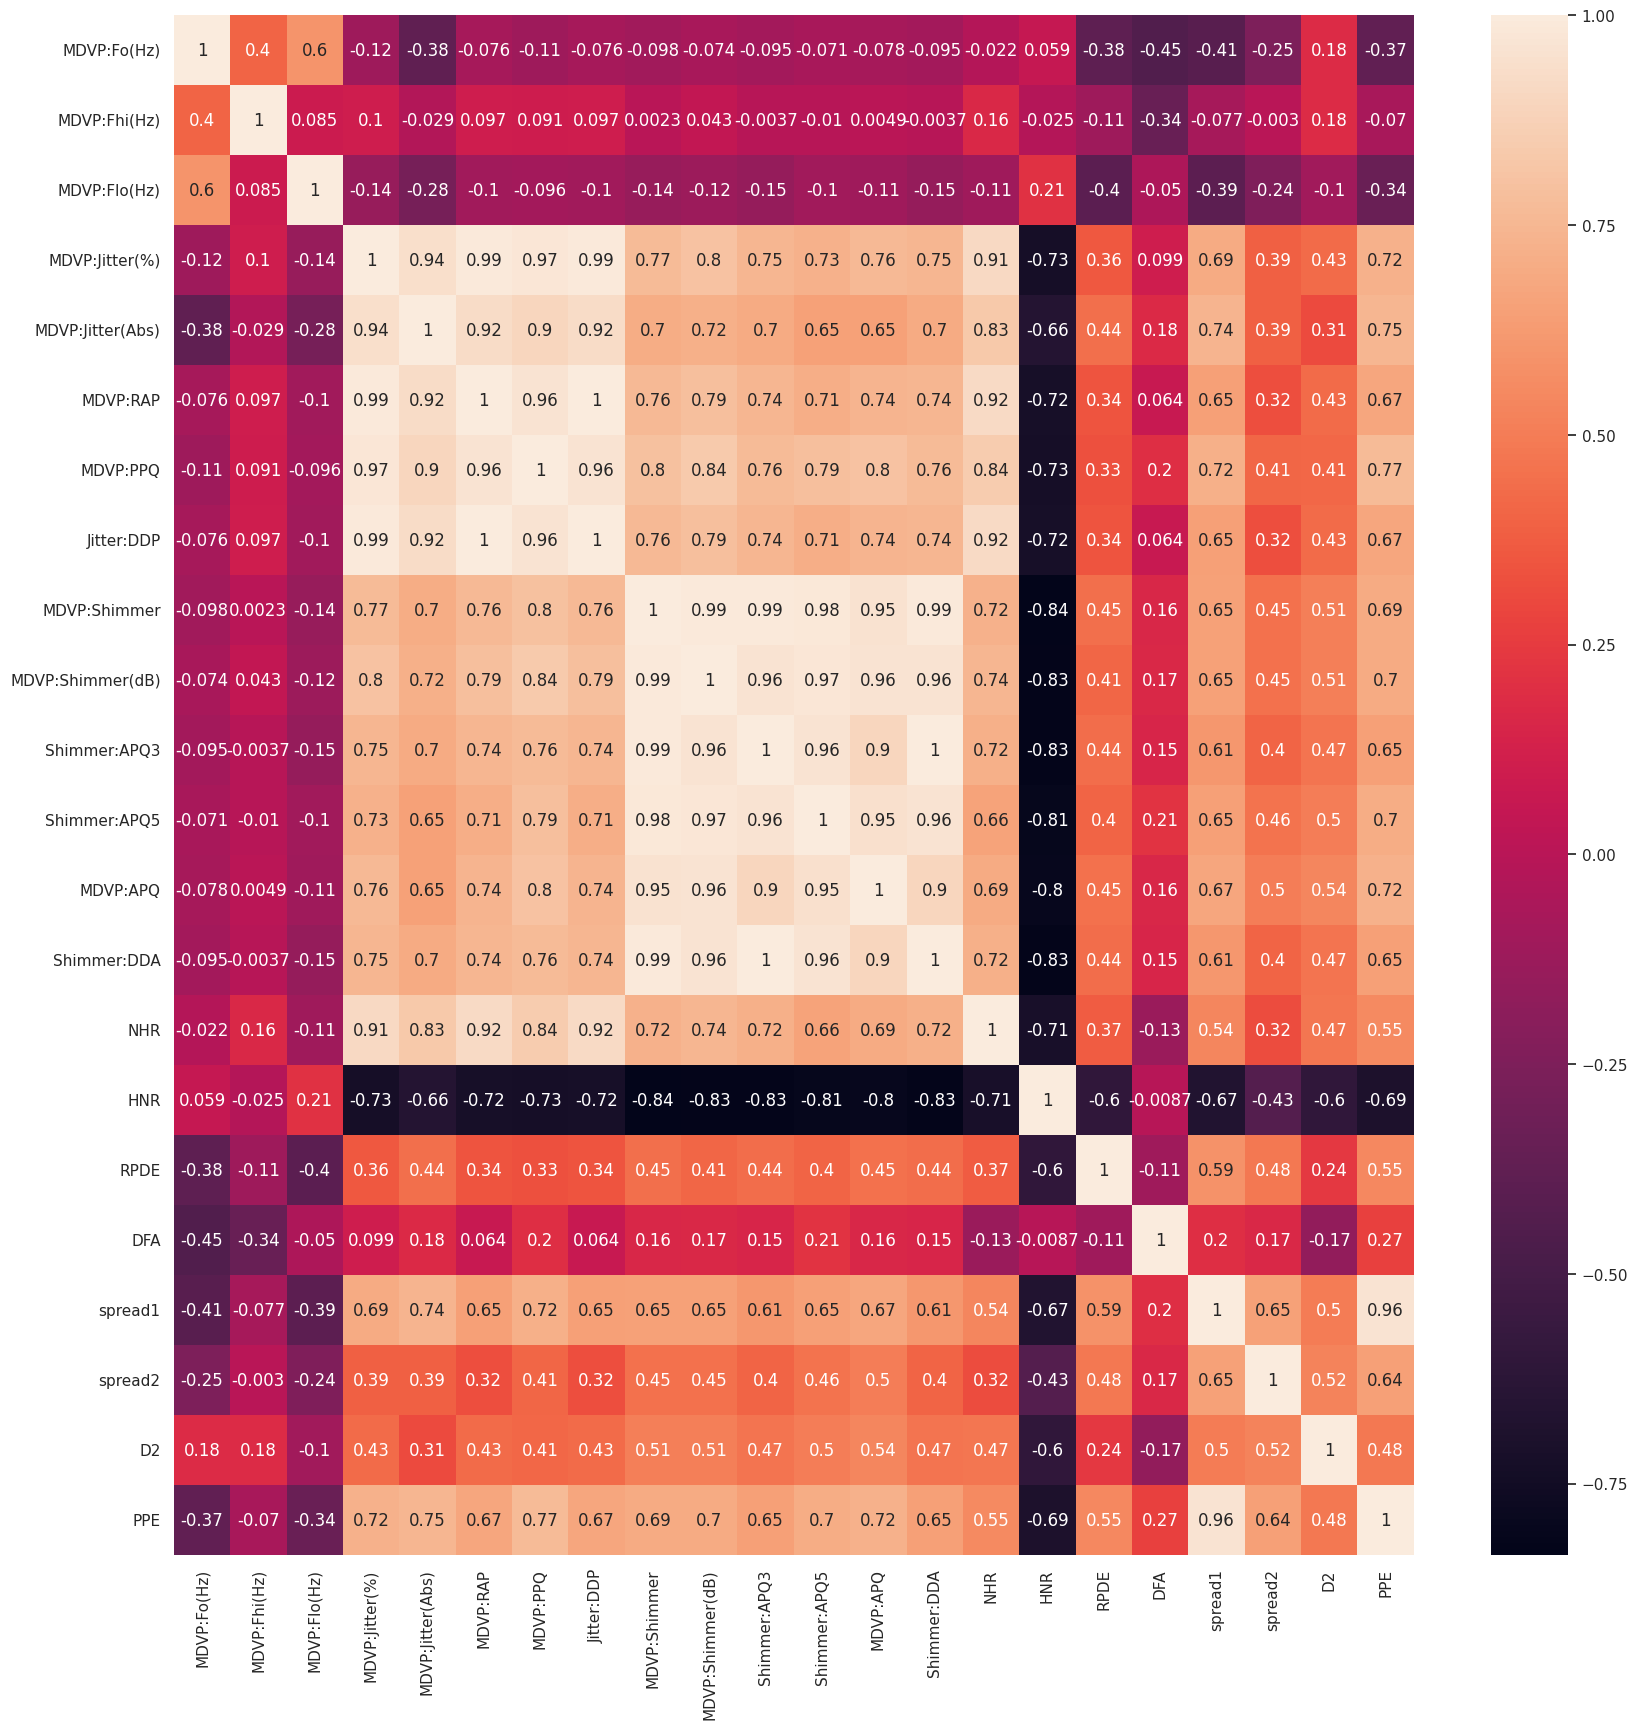

In [ ]:
sns.set(rc = {'figure.figsize' : (20,20)})
sns.heatmap(df_X_corr, annot = True)

In [ ]:
upper_tri = df_X_corr.where(np.triu(np.ones(df_X_corr.shape),k=1).astype(np.bool))
# upper_tri
df_corr_remove = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95 )]
df_corr_remove = pd.DataFrame(df_corr_remove).rename(columns={0:'col_drop'})
df_corr_remove

<ipython-input-15-60a3a4a2803b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = df_X_corr.where(np.triu(np.ones(df_X_corr.shape),k=1).astype(np.bool))


,col_drop
0,MDVP:RAP
1,MDVP:PPQ
2,Jitter:DDP
3,MDVP:Shimmer(dB)
4,Shimmer:APQ3
5,Shimmer:APQ5
6,MDVP:APQ
7,Shimmer:DDA
8,PPE


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.25, random_state=4)

## KNN

<ipython-input-17-8fe48862a116>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_rmse = acc_rmse.append({'K': i, 'Accuracy': metrics.accuracy_score(y_test, pred_y), 'RMSE':metrics.mean_squared_error(y_test, pred_y)}, ignore_index=True)
<ipython-input-17-8fe48862a116>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_rmse = acc_rmse.append({'K': i, 'Accuracy': metrics.accuracy_score(y_test, pred_y), 'RMSE':metrics.mean_squared_error(y_test, pred_y)}, ignore_index=True)
<ipython-input-17-8fe48862a116>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_rmse = acc_rmse.append({'K': i, 'Accuracy': metrics.accuracy_score(y_test, pred_y), 'RMSE':metrics.mean_squared_error(y_test, pred_y)}, ignore_index=True)
<ipython-i

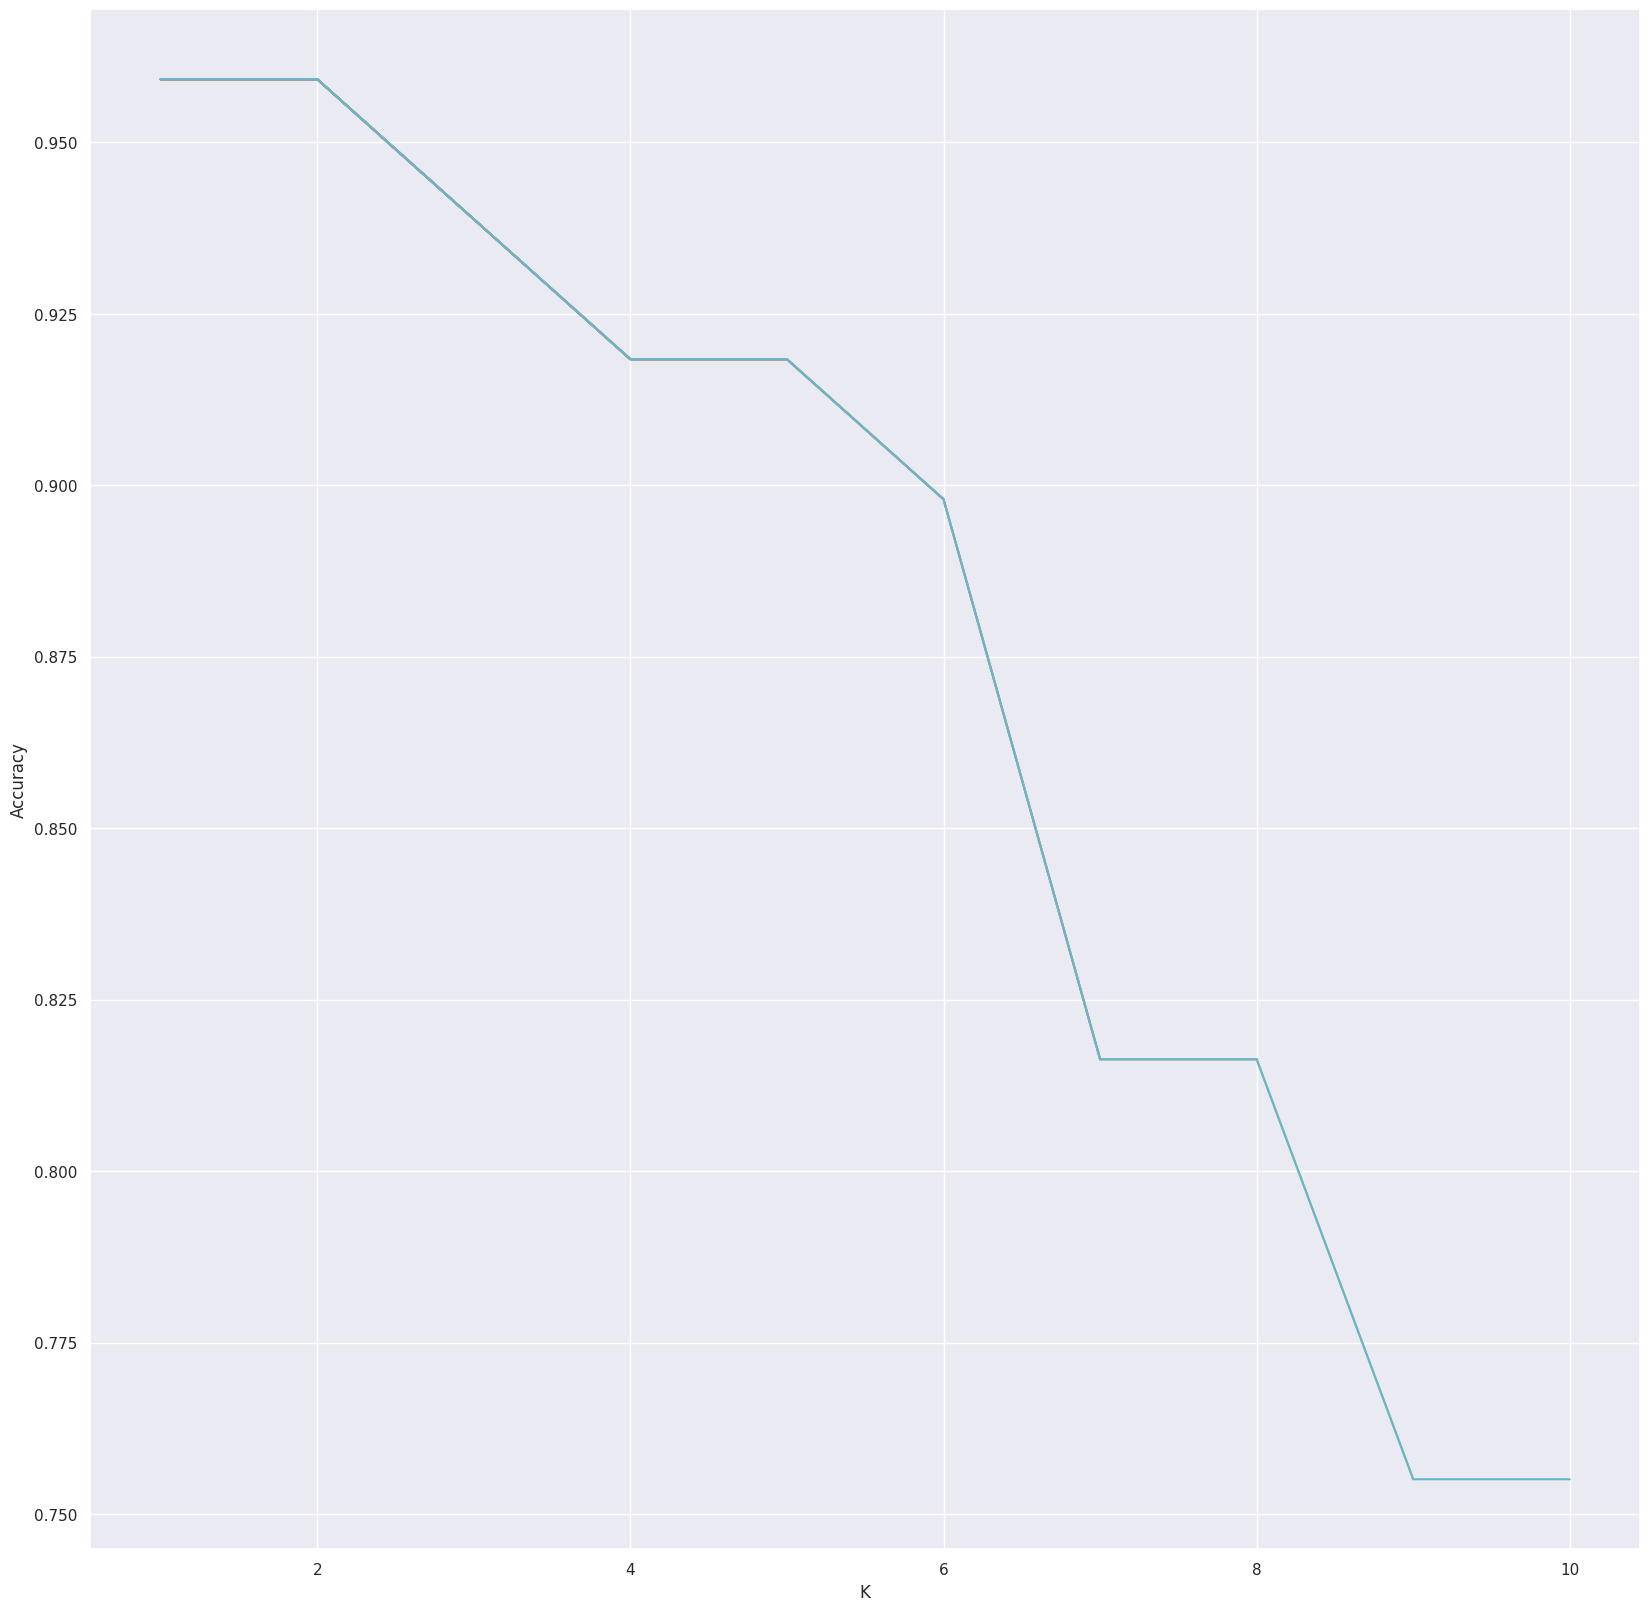

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

lis = [1,2,3,4,5,6,7,8,9,10]

acc_rmse = pd.DataFrame(columns=["K","Accuracy", "RMSE"])
for i in lis:
  k = i
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  pred_y = neigh.predict(X_test)
  acc_rmse = acc_rmse.append({'K': i, 'Accuracy': metrics.accuracy_score(y_test, pred_y), 'RMSE':metrics.mean_squared_error(y_test, pred_y)}, ignore_index=True)
  sns.lineplot(data=acc_rmse, x="K", y="Accuracy")

In [ ]:
acc_rmse

,K,Accuracy,RMSE
0,1.0,0.959184,0.040816
1,2.0,0.959184,0.040816
2,3.0,0.938776,0.061224
3,4.0,0.918367,0.081633
4,5.0,0.918367,0.081633
5,6.0,0.897959,0.102041
6,7.0,0.816327,0.183673
7,8.0,0.816327,0.183673
8,9.0,0.755102,0.244898
9,10.0,0.755102,0.244898


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)

Pred_y = neigh.predict(X_test)

acc_knn = accuracy_score(y_test,Pred_y)
# acc_knn = mean_squared_error(y_test, pred_y)

Predicted_Y = pd.DataFrame(Pred_y).rename(columns ={0:'Predicted Y'})
Predicted_Y

,Predicted Y
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pred_y))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.94      0.97        33

    accuracy                           0.96        49
   macro avg       0.94      0.97      0.95        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_knn,recall_knn,fscore_knn,support_knn=score(y_test,Pred_y,average='macro')

fscore_knn

0.9549632352941176

## Decision tree

In [ ]:
clf_en = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 6).fit(X_train,y_train)
y_pred_tree = clf_en.predict(X_test)
acc_dt = metrics.accuracy_score(y_test, y_pred_tree)

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_tree, labels=None, sample_weight=None, normalize=None)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_dt,recall_dt,fscore_dt,support_dt=score(y_test,y_pred_tree,average='macro')

fscore_dt

0.903921568627451

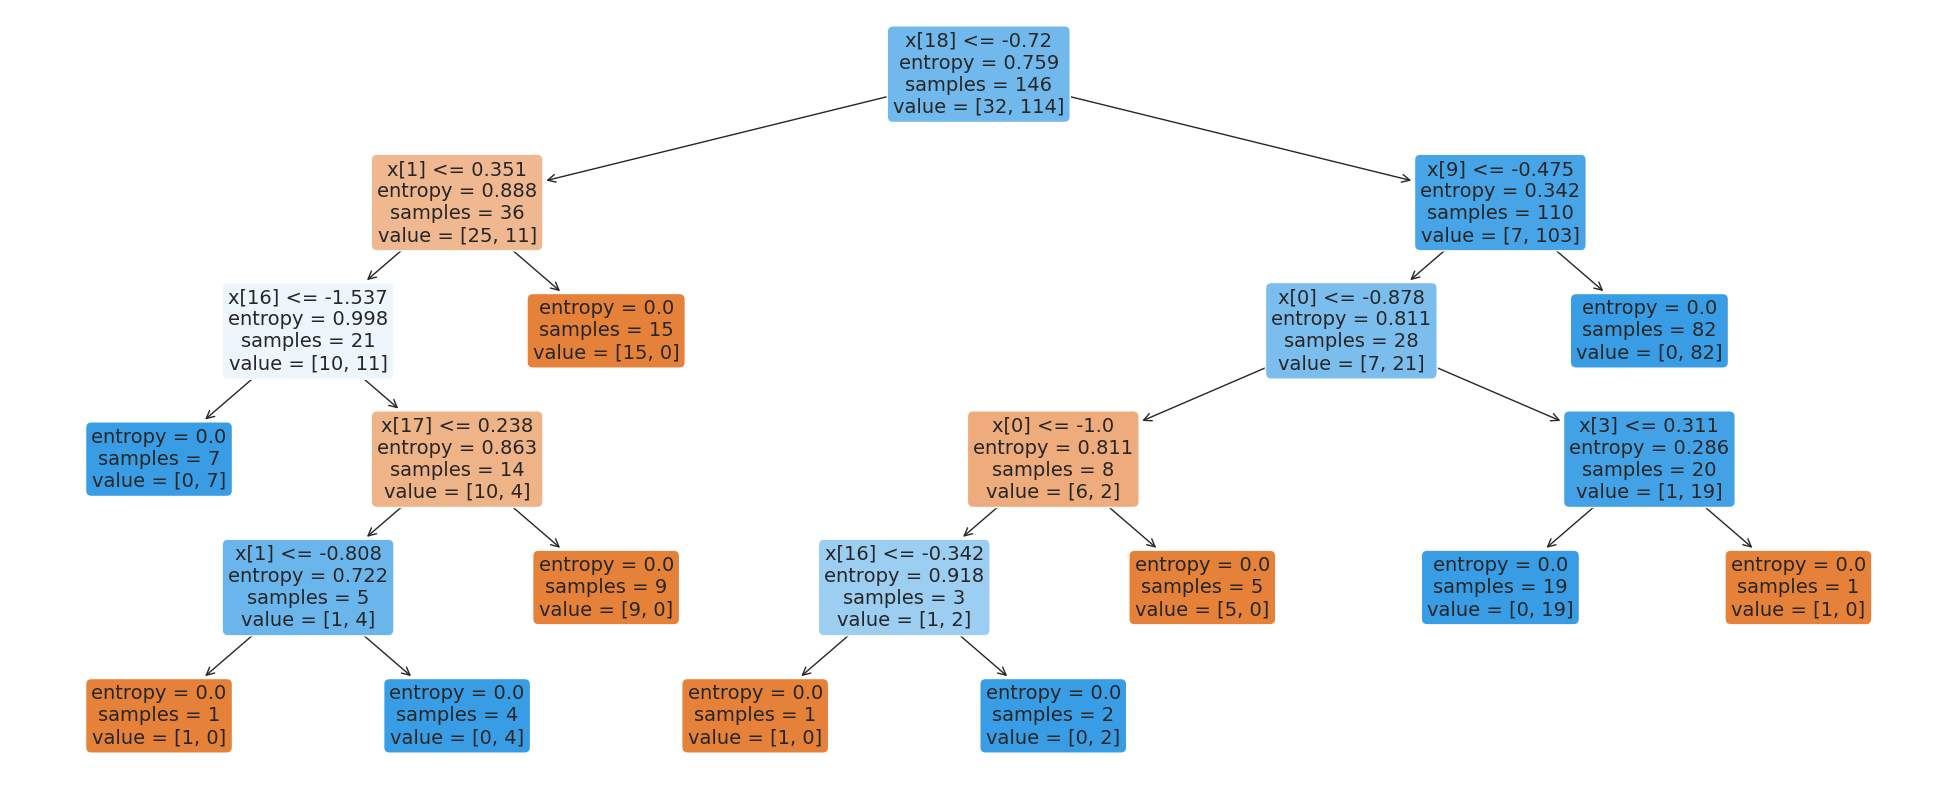

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(clf_en,
              # feature_names = y_pred_tree.values_,
              # class_names=y_train.columns,
              filled=True,
              rounded=True,
              fontsize=14)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred_log = logmodel.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log, labels=None, sample_weight=None, normalize=None)


In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.82      0.94      0.87        33

    accuracy                           0.82        49
   macro avg       0.82      0.75      0.77        49
weighted avg       0.82      0.82      0.81        49



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_log,recall_log,fscore_log,support_log=score(y_test,y_pred_log,average='macro')

fscore_log

0.7699530516431925

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_nb  =  classifier.predict(X_test)
acc_naive = metrics.accuracy_score(y_test, y_pred_nb)

In [ ]:
cm_naive = confusion_matrix(y_test, y_pred_nb, labels=None, sample_weight=None, normalize=None)


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.48      0.88      0.62        16
           1       0.90      0.55      0.68        33

    accuracy                           0.65        49
   macro avg       0.69      0.71      0.65        49
weighted avg       0.76      0.65      0.66        49



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_nb,recall_nb,fscore_nb,support_nb=score(y_test,y_pred_nb,average='macro')

fscore_nb

0.6507337526205451

In [ ]:

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

acc_svm = metrics.accuracy_score(y_test, y_pred_svm)

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=None, sample_weight=None, normalize=None)


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.82      0.97      0.89        33

    accuracy                           0.84        49
   macro avg       0.86      0.77      0.79        49
weighted avg       0.85      0.84      0.82        49



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_svm,recall_svm,fscore_svm,support_svm=score(y_test,y_pred_svm,average='macro')

precision_svm

0.8602564102564103

In [ ]:
df_accuracy = pd.DataFrame({acc_knn, acc_dt, acc_log, acc_naive, acc_svm}).transpose().rename(columns = {0:'Acc_KNN', 1:'Acc_DT', 2:'Acc_Log', 3:'Acc_SVM', 4:'Acc_Naive'}).transpose()
df_accuracy = df_accuracy.reset_index().rename(columns={'index':'Model',0:'Accuracy'})
df_accuracy['Accuracy'] = df_accuracy['Accuracy'].apply(lambda x: x*100)
df_accuracy

,Model,Accuracy
0,Acc_KNN,95.918367
1,Acc_DT,91.836735
2,Acc_Log,83.673469
3,Acc_SVM,65.306122
4,Acc_Naive,81.632653


<Axes: xlabel='Model', ylabel='Accuracy'>

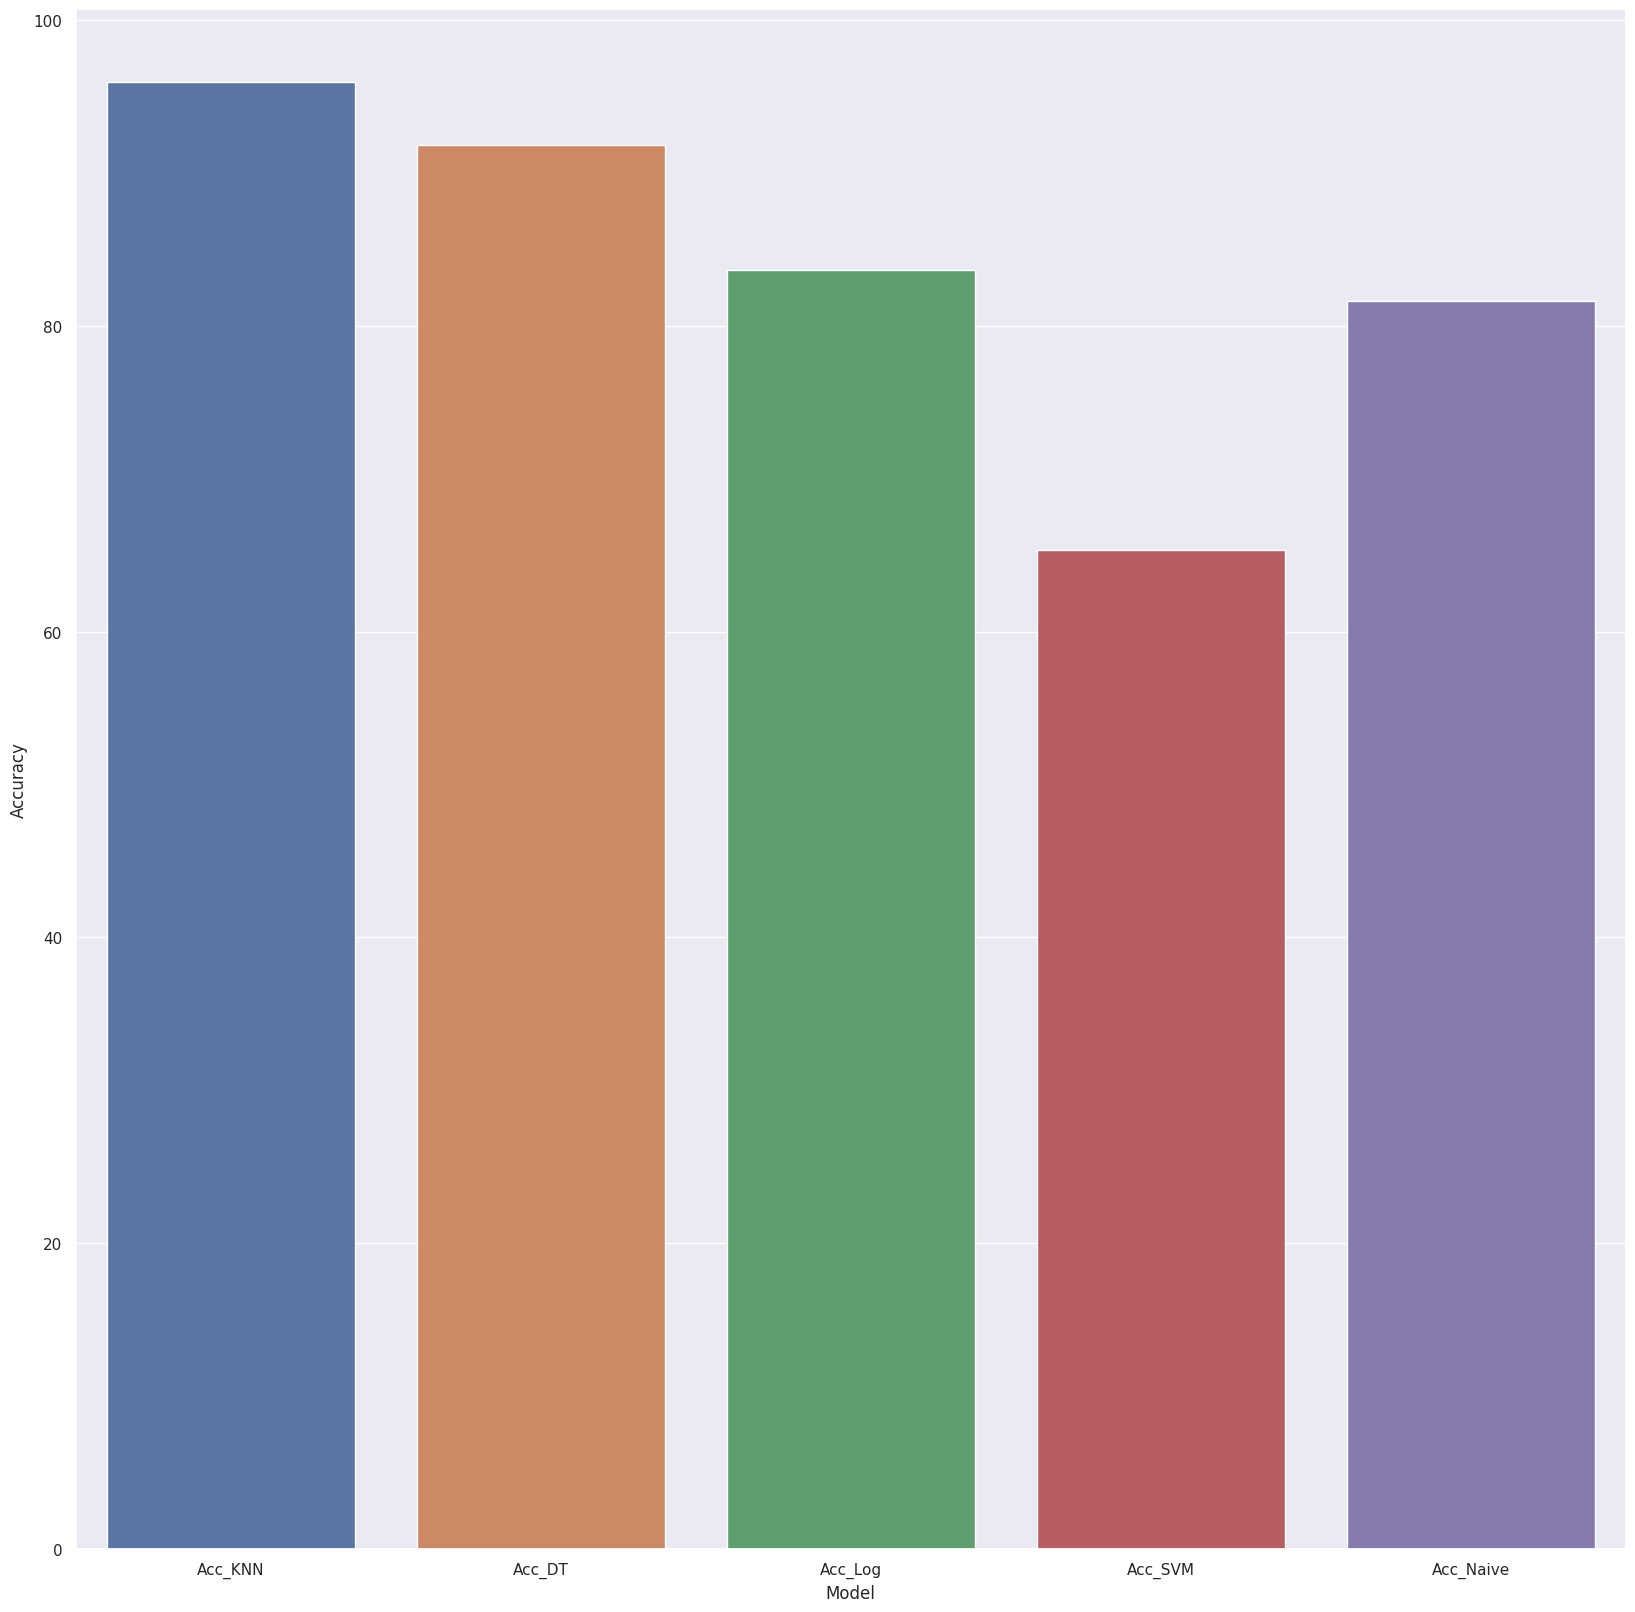

In [ ]:
sns.barplot(data=df_accuracy, x='Model',y='Accuracy')

In [ ]:
df_precision = pd.DataFrame({precision_knn, precision_dt, precision_log, precision_nb, precision_svm}).transpose().rename(columns = {0:'Precision KNN', 1:'Precision DT', 2:'Precision Log', 3:'Precision NB', 4:'Precision_SVM'}).transpose()
df_precision = df_precision.reset_index().rename(columns={'index':'Model',0:'Precision'})
df_precision

,Model,Precision
0,Precision KNN,0.944444
1,Precision DT,0.921429
2,Precision Log,0.816986
3,Precision NB,0.860256
4,Precision_SVM,0.691379


<Axes: xlabel='Model', ylabel='Precision'>

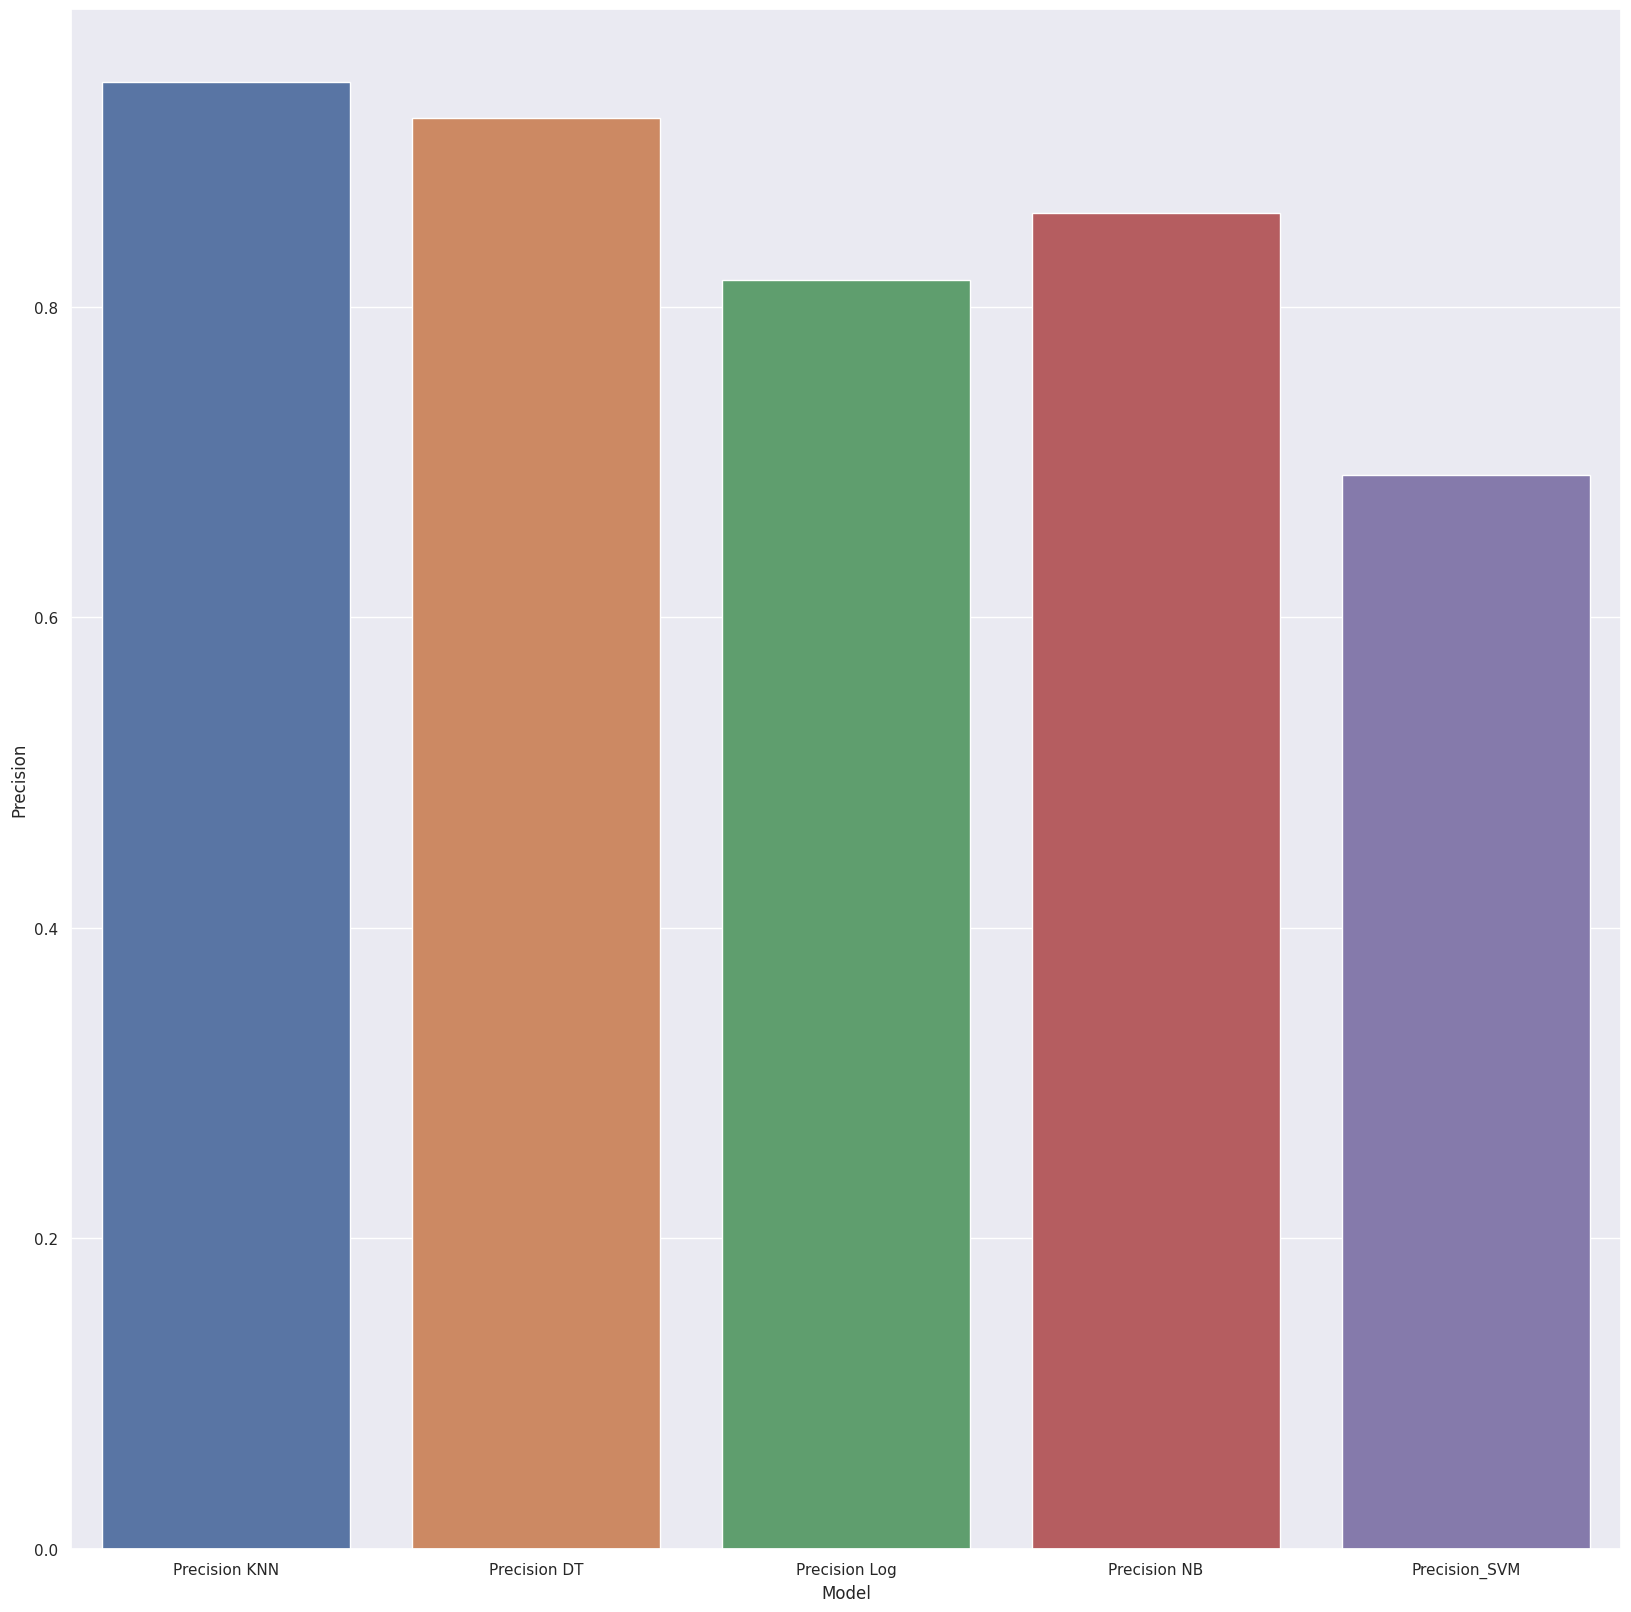

In [ ]:
sns.barplot(data=df_precision, x='Model',y='Precision')

In [ ]:
df_f1score = pd.DataFrame({fscore_knn, fscore_dt, fscore_log, fscore_nb, fscore_svm}).transpose().rename(columns = {0:'F1 Score KNN', 1:'F1 Score DT', 2:'F1 Score Log', 3:'F1 Score NB', 4:'F1 Score'}).transpose()
df_f1score = df_f1score.reset_index().rename(columns={'index':'Model',0:'F1 Score'})
df_f1score

,Model,F1 Score
0,F1 Score KNN,0.954963
1,F1 Score DT,0.903922
2,F1 Score Log,0.790598
3,F1 Score NB,0.650734
4,F1 Score,0.769953


<Axes: xlabel='Model', ylabel='F1 Score'>

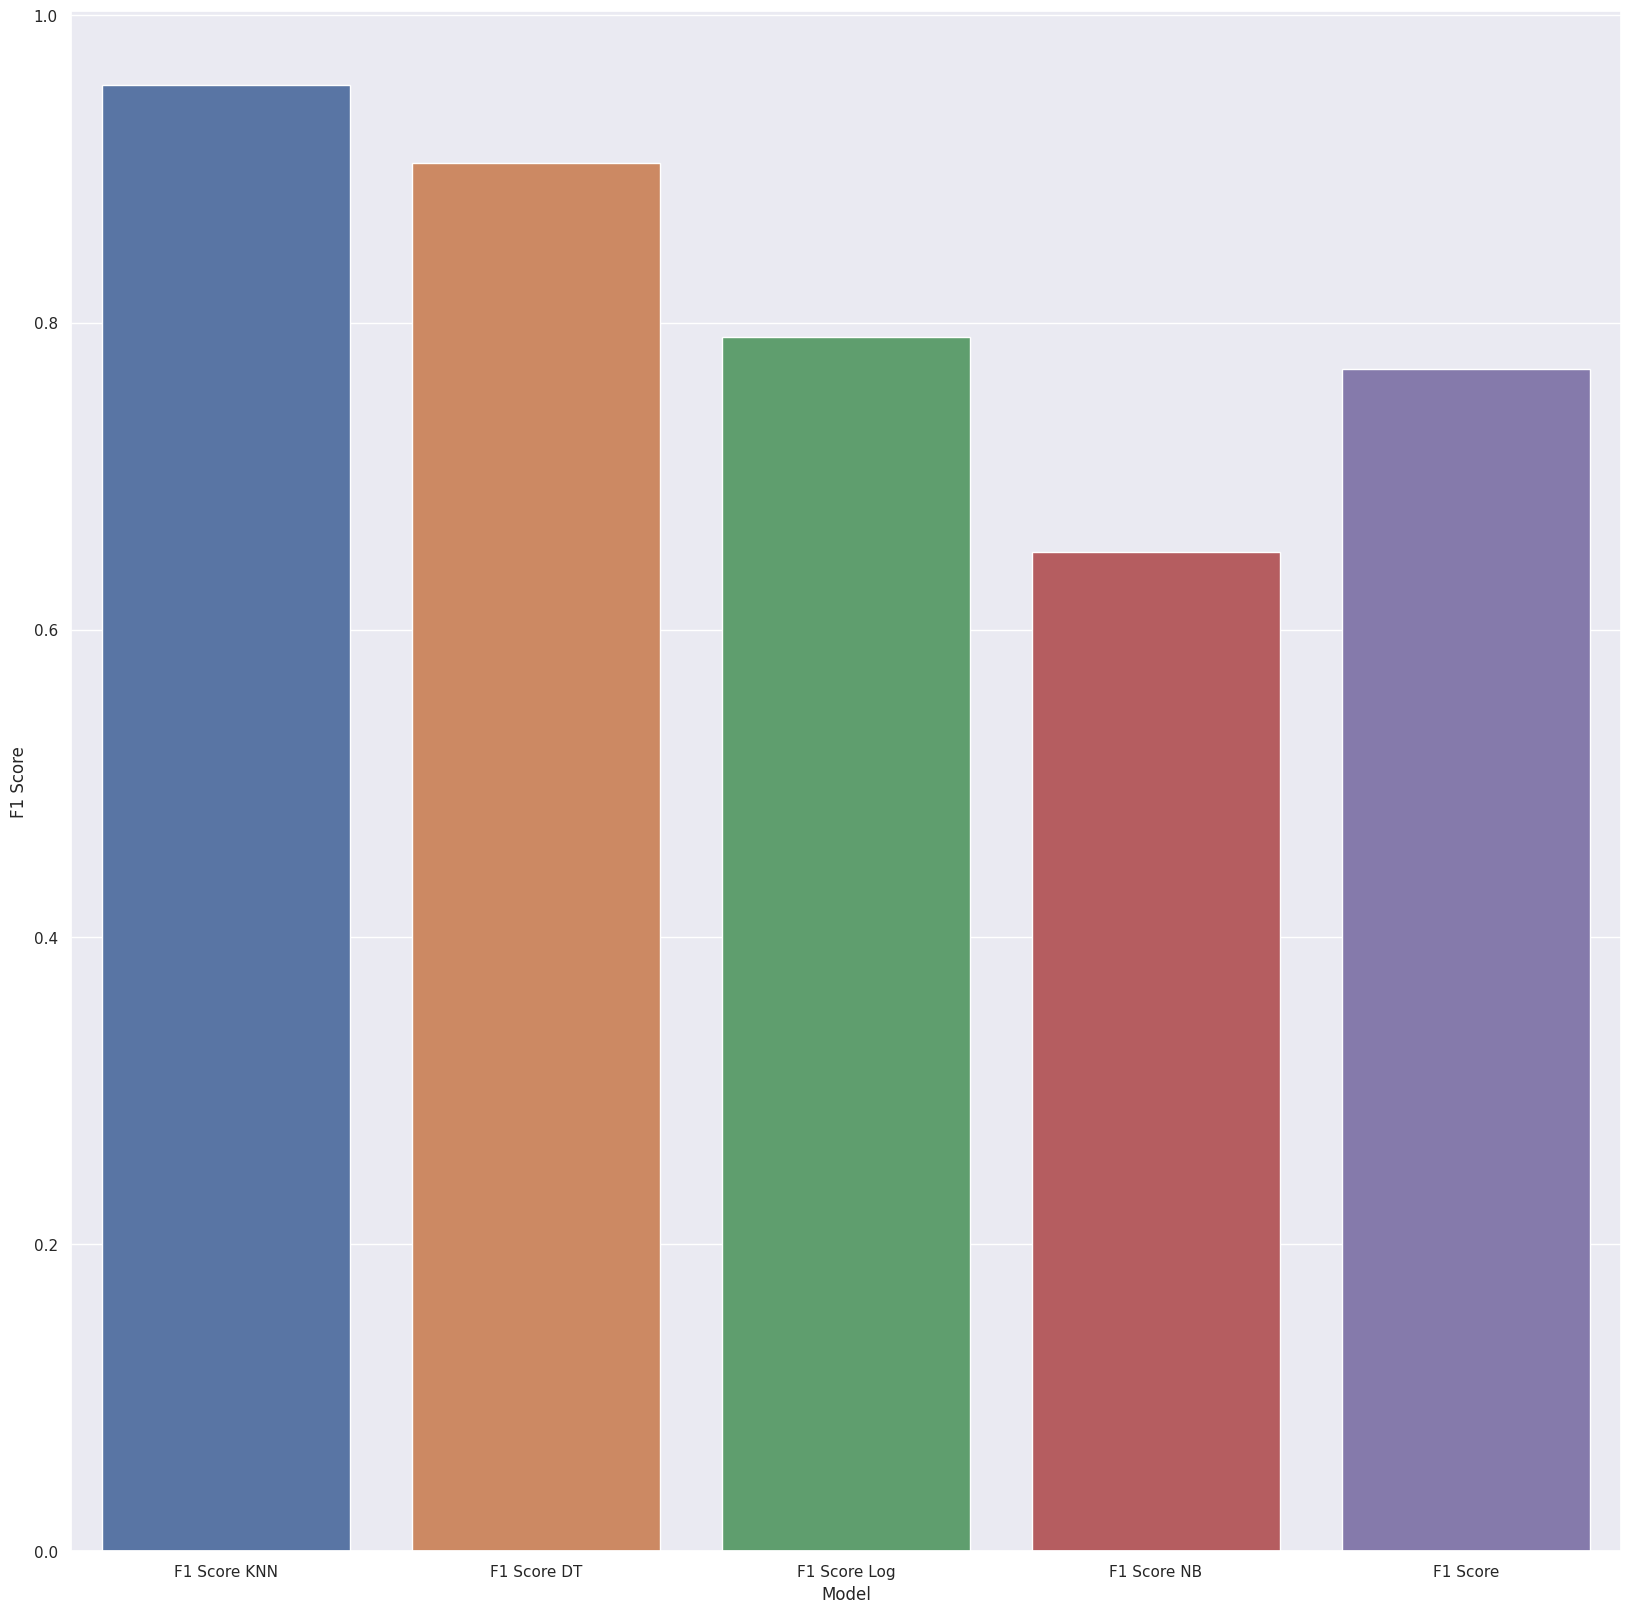

In [ ]:
sns.barplot(data=df_f1score, x='Model',y='F1 Score')